# Imports

In [56]:
import yfinance        as yf
import seaborn         as sns
import numpy           as np
import pandas          as pd
import statsmodels.api as sm

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve, mean_squared_error

from matplotlib              import pyplot as plt
from pandas_datareader       import data   as pdr
from IPython.core.display    import HTML

## Helper Functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Loading data

In [4]:
start = '2000-01-01'
#end = '2019-12-31'
end = '2021-12-31'

data = pdr.get_data_yahoo( '^GSPC', start=start, end=end )

In [5]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


In [6]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,4791.490234,4733.990234,4733.990234,4791.189941,2264120000,4791.189941
2021-12-28,4807.020020,4780.040039,4795.490234,4786.350098,2217050000,4786.350098
2021-12-29,4804.060059,4778.080078,4788.640137,4793.060059,2369370000,4793.060059
2021-12-30,4808.930176,4775.330078,4794.229980,4778.729980,2390990000,4778.729980
2021-12-31,4786.830078,4765.750000,4775.209961,4766.180176,2446190000,4766.180176


# Data Description

In [7]:
df2 = data.copy()

In [8]:
df2.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

# Times Series Visualization

In [9]:
df3 = df2.copy()

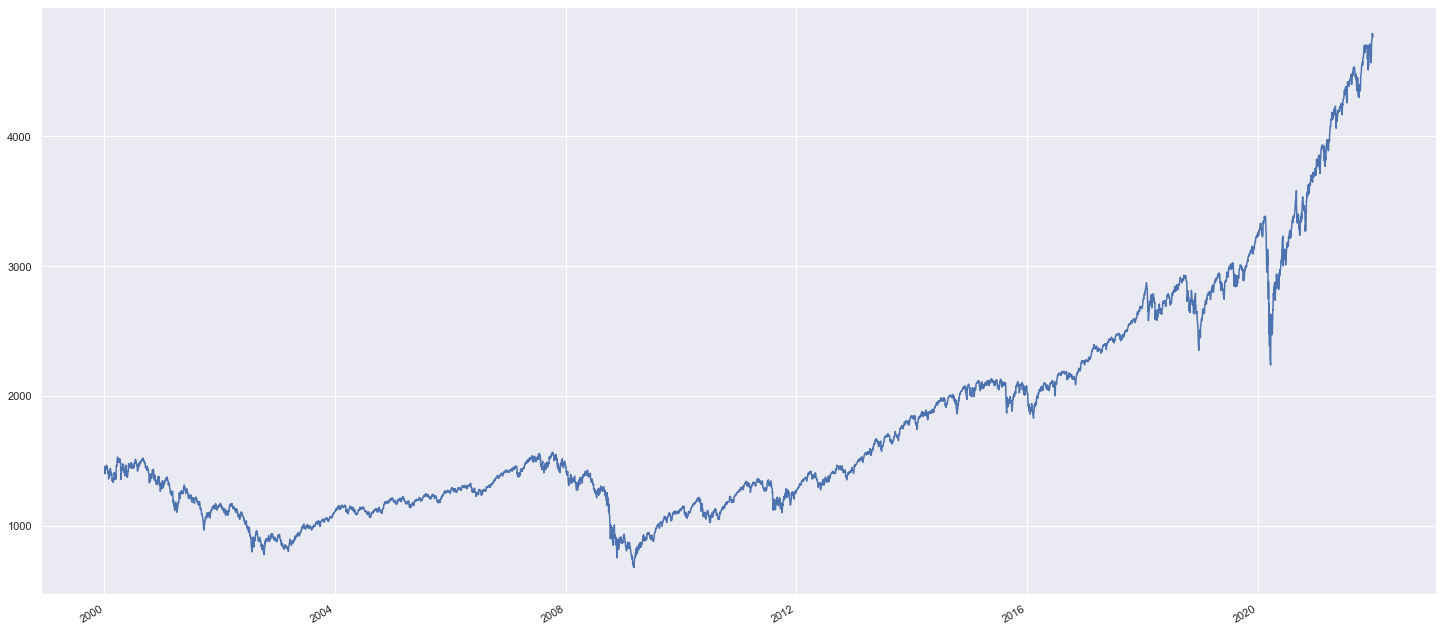

In [10]:
df3['Close'].plot()
#plt.title( 'Gráfico da Série S&P 500' );
plt.xlabel( '' );

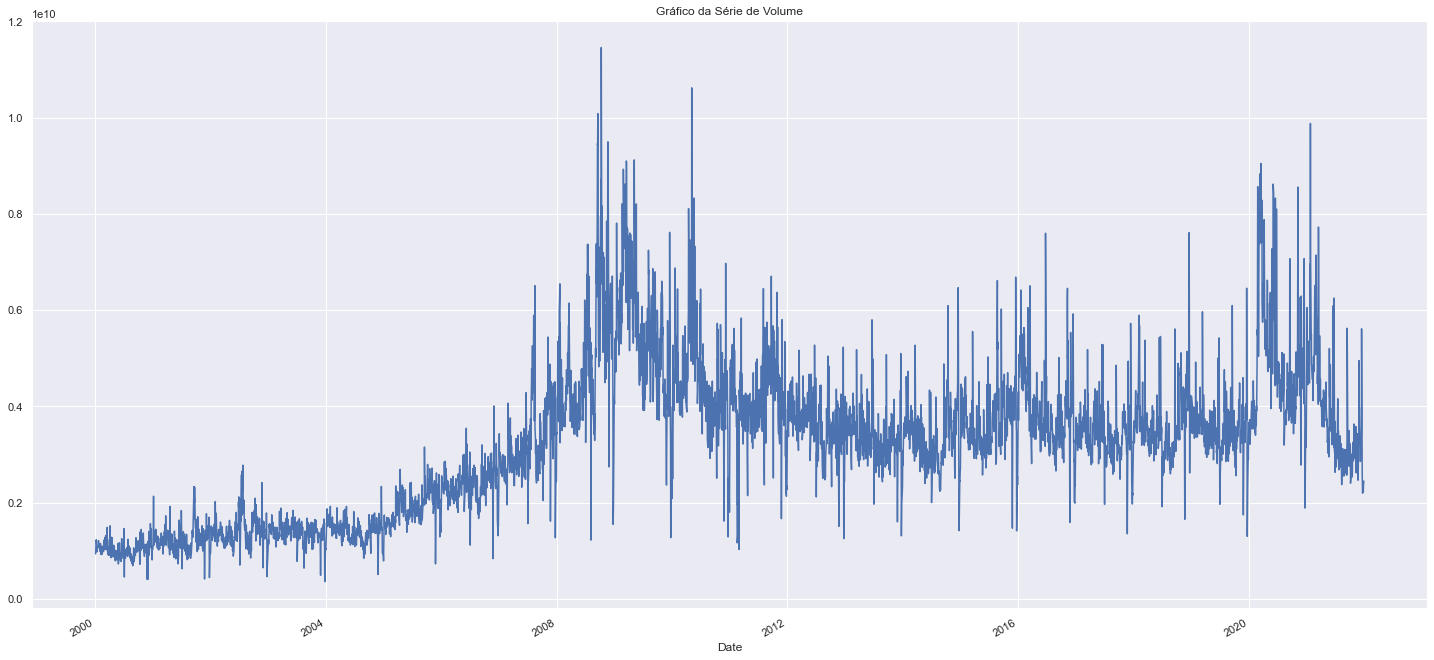

In [11]:
df3['Volume'].plot();
plt.title( 'Gráfico da Série de Volume' );

# Exploratory Data Analysis

In [12]:
df4 = df3.copy()

In [13]:
df4.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5536.000000,5536.000000,5536.000000,5536.000000,5.536000e+03,5536.000000
mean,1782.776350,1761.740248,1772.645393,1772.919517,3.208404e+09,1772.919517
std,860.650714,854.549441,857.607760,857.951476,1.509918e+09,857.951476
min,695.270020,666.789978,679.280029,676.530029,3.560700e+08,676.530029
25%,1182.145020,1166.177460,1173.787537,1173.807556,1.855348e+09,1173.807556
50%,1415.910034,1399.619995,1409.135010,1409.125000,3.298360e+09,1409.125000
75%,2131.514954,2115.752441,2124.072449,2125.790039,4.027782e+09,2125.790039
max,4808.930176,4780.040039,4795.490234,4793.060059,1.145623e+10,4793.060059


In [14]:
# lag de X periodos

periodos = 1

# lag positivo de X periodos
df4['Lag_P1'] = df4['Close'].shift( periodos )

In [15]:
df4.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1
Date,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951


In [16]:
# Dummy para saber se o dia atual é Alta(1) ou Baixa(0)

df4['High_Low'] = np.where( df4['Close'] > df4['Lag_P1'], 1, 0 )

In [17]:
df4.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low
Date,,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN,0
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971,0
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044,1
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985,1
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951,1


In [18]:
df4['High_Low'].mean()

0.5384754335260116

In [19]:
# Calculando o Retorno

df4['Retorno'] = df4['Close'].pct_change( periodos )

In [20]:
df4.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low,Retorno
Date,,,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN,0,NaN
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971,0,-0.038345
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044,1,0.001922
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985,1,0.000956
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951,1,0.027090


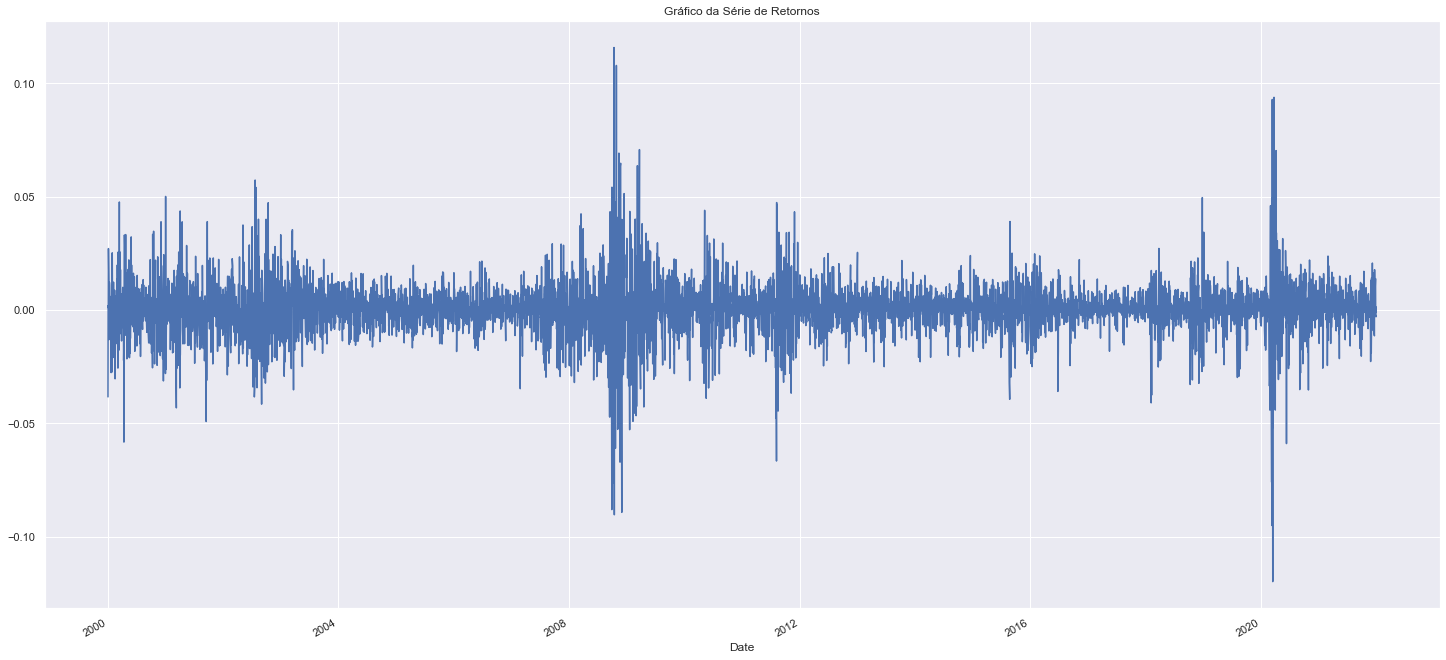

In [21]:
df4['Retorno'].plot()
plt.title( 'Gráfico da Série de Retornos' );

C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


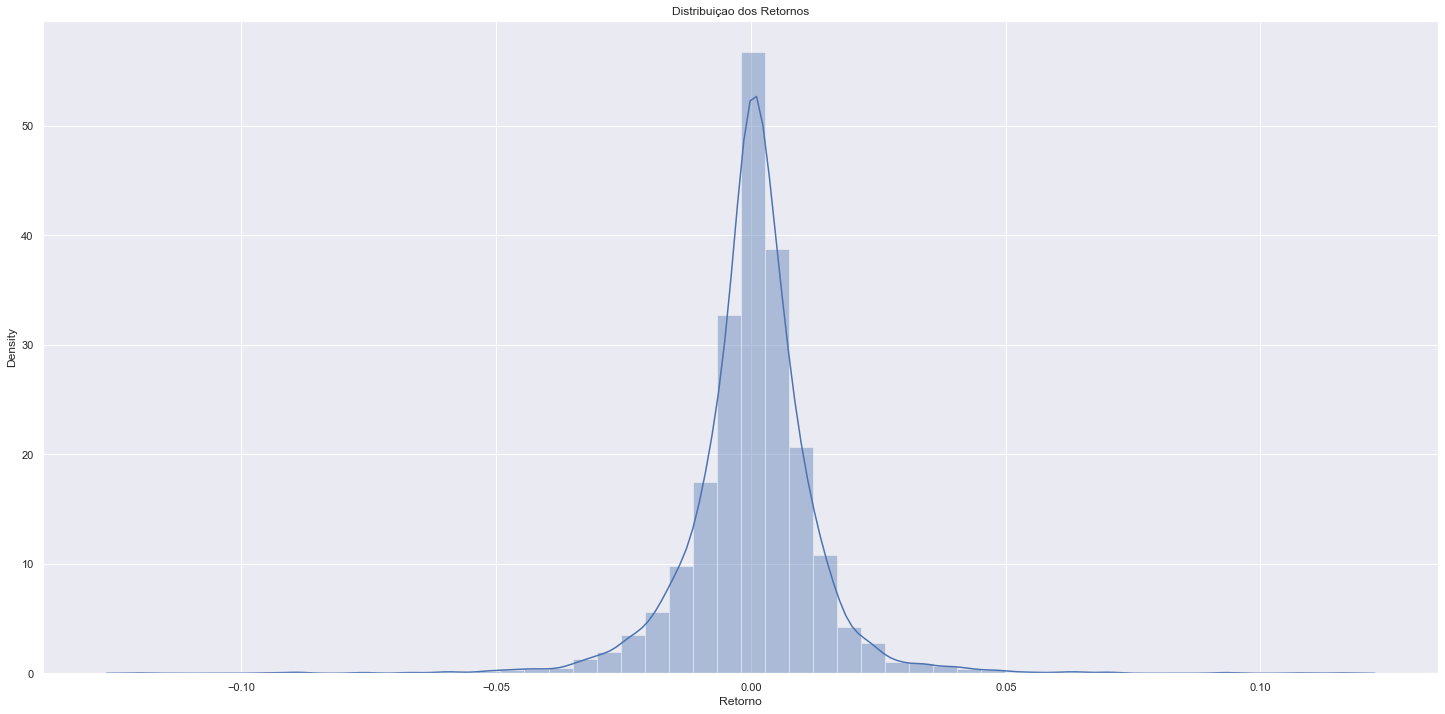

In [22]:
sns.distplot( df4['Retorno'], 
              bins = 50,
              kde=True
            )
plt.title( 'Distribuiçao dos Retornos' );

C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


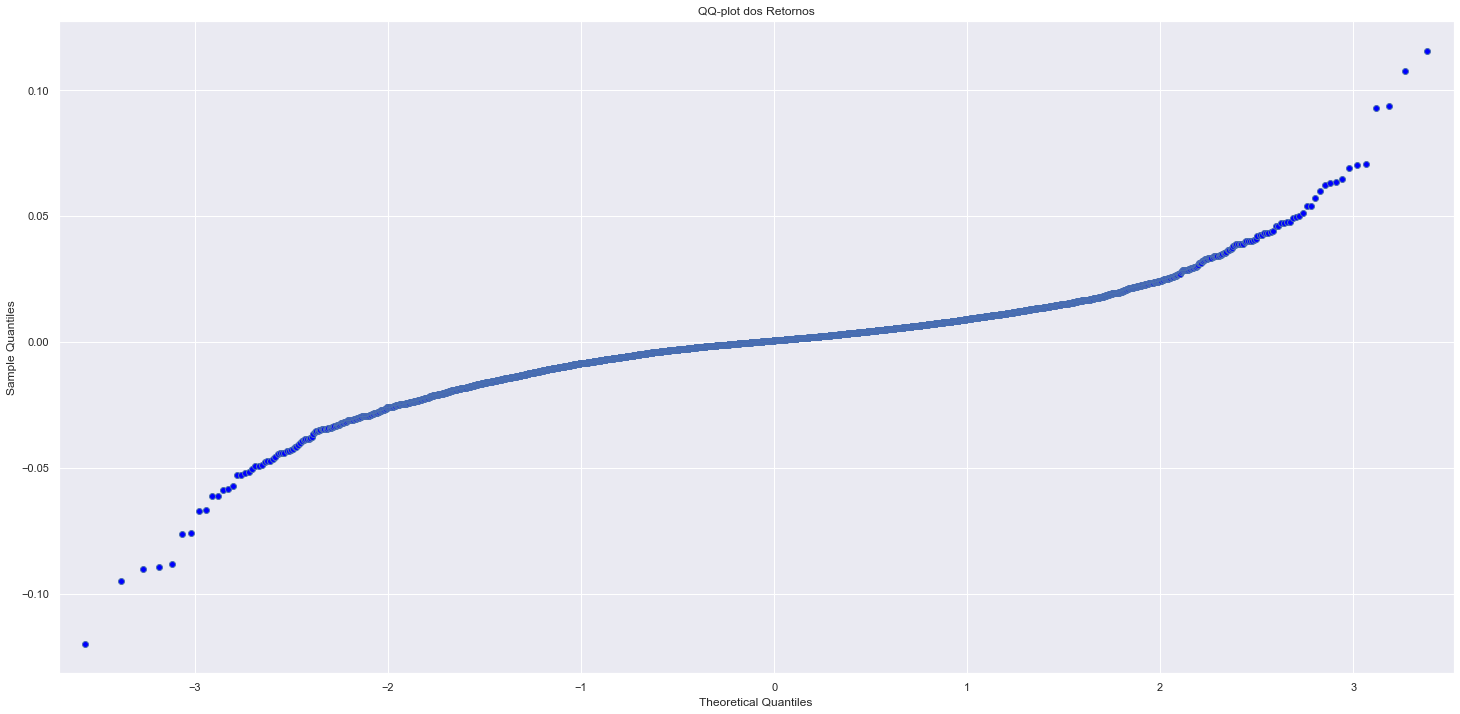

In [23]:
sm.qqplot( df4['Retorno'] )
plt.title( 'QQ-plot dos Retornos' );

Consolidando os gráficos da série histórica, série de retornos, distribuição dos retornos e qq-plot em uma mesma imagem.

C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


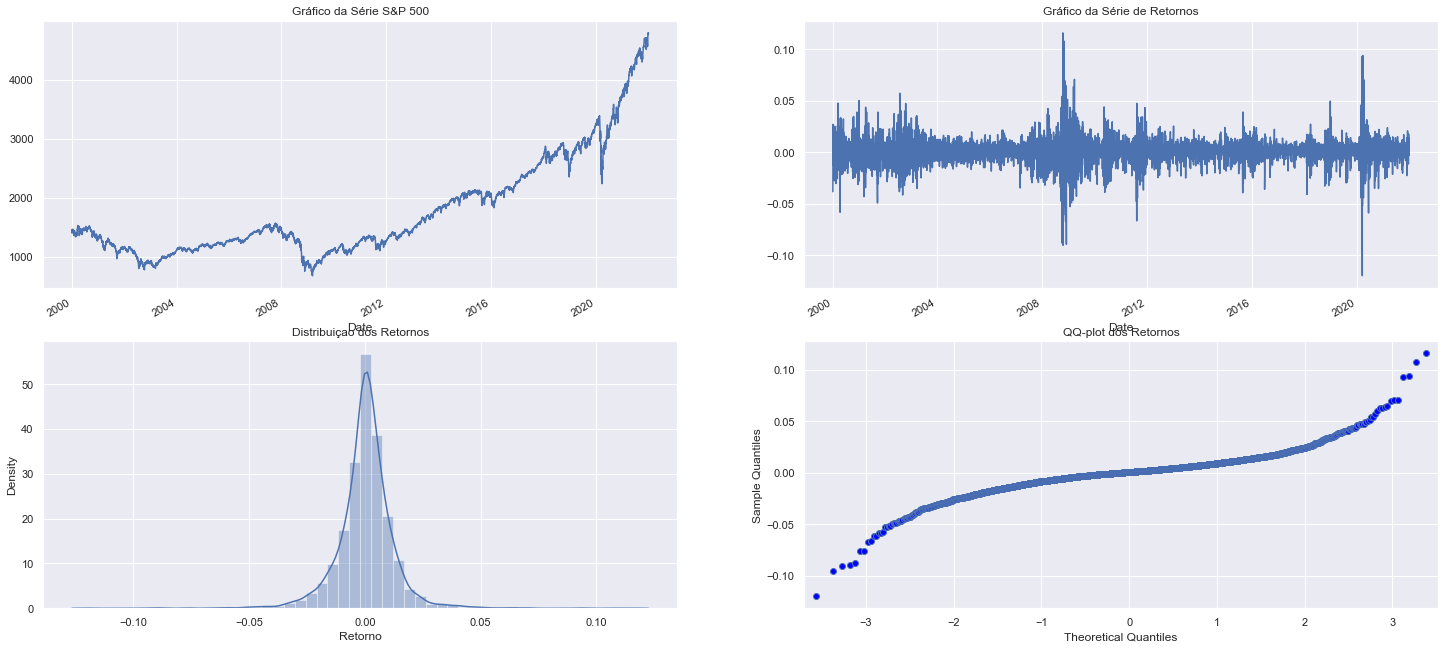

In [24]:
plt.subplot( 2, 2, 1 )
df3['Close'].plot()
plt.title( 'Gráfico da Série S&P 500' );

plt.subplot( 2, 2, 2 )
df4['Retorno'].plot()
plt.title( 'Gráfico da Série de Retornos' );

plt.subplot( 2, 2, 3 )
sns.distplot( df4['Retorno'], 
              bins = 50,
              kde=True
            )
plt.title( 'Distribuiçao dos Retornos' );

#plt.subplot( 2, 2, 4 )
sm.qqplot( df4['Retorno'], ax=plt.subplot( 2, 2, 4 ) ) 
plt.title( 'QQ-plot dos Retornos' );

In [25]:
df4['Retorno'].describe()

count    5535.000000
mean        0.000291
std         0.012369
min        -0.119841
25%        -0.004692
50%         0.000636
75%         0.005830
max         0.115800
Name: Retorno, dtype: float64

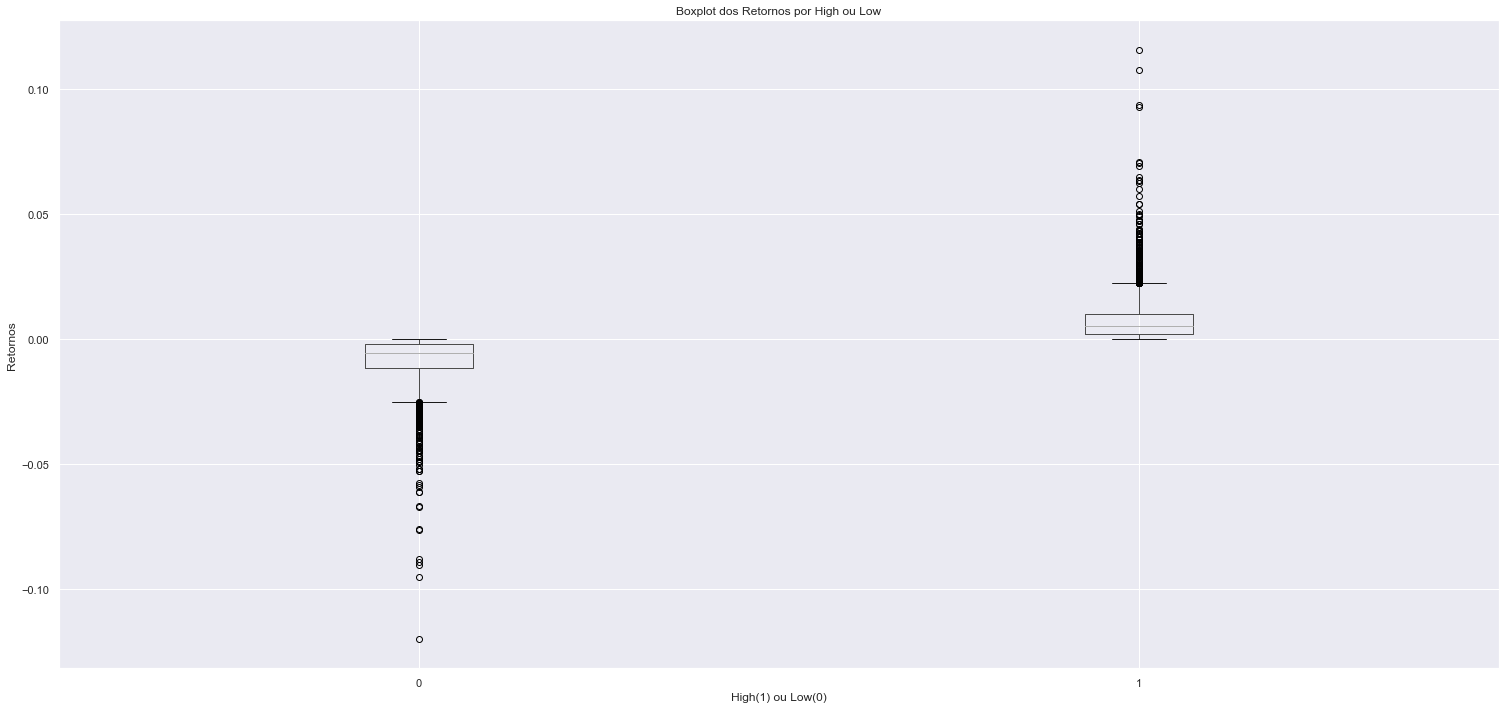

In [26]:
df4.boxplot( by='High_Low', column=['Retorno'], grid = True ) 
title = 'Boxplot dos Retornos por High ou Low'
plt.title( title )
plt.suptitle( '' ) # para eliminar o titulo padrao do boxplot do pandas
plt.ylabel( 'Retornos' )
plt.xlabel( 'High(1) ou Low(0)' )
plt.show();

# Feature Engineering

In [27]:
df5 = df4.copy()

In [28]:
df5.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low,Retorno
Date,,,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN,0,NaN
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971,0,-0.038345
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044,1,0.001922
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985,1,0.000956
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951,1,0.027090


## Creating targets and features

In [29]:
# Adicionando um alvo

df5["Alvo1"] = df5["Retorno"].shift( -periodos )
df5["Alvo1_Bin"] = np.where( df5["Alvo1"] > 0 , 1, 0 )

In [30]:
# Construçao das Variaveis

# Desvio Padrao de 5 dias
df5["std5"] = df5["Retorno"].rolling(5).std()

# Desvio Padrao de 10 dias
df5["std10"] = df5["Retorno"].rolling(10).std()

# Desvio Padrao de 15 dias
df5["std15"] = df5["Retorno"].rolling(15).std()

# Proporçao do corpo do candle em relacao ao range do dia
df5["prop"] = (df5["Close"]-df5["Open"])/(df5["High"]-df5["Low"])

# Direçao do dia atual
df5["dir_D"] = np.where(df5['Close'] > df5['Open'] , '1', '0')

# Direçao D-1
df5["dir_D-1"] = df5["dir_D"].shift(1)

# Direçao D-2
df5["dir_D-2"] = df5["dir_D"].shift(2)

# Direçao D-3
df5["dir_D-3"] = df5["dir_D"].shift(3)

# Media Movel de 15 dias std5
df5["mm_std5"] = df5["std5"].rolling(15).mean()

# Media Movel de 15 dias std5
df5["mm_std10"] = df5["std10"].rolling(15).mean()

# Media Movel de 15 dias std5
df5["mm_std15"] = df5["std15"].rolling(15).mean()

# RSL std5
df5["RSL_std5"] = (df5["std5"]/df5["std5"].rolling(15).mean())-1

# RSL std10
df5["RSL_std10"] = (df5["std10"]/df5["std10"].rolling(15).mean())-1

# RSL std15
df5["RSL_std15"] = (df5["std15"]/df5["std15"].rolling(15).mean())-1

In [31]:
# Filtrando os valores missing

df5_filtrado = df5.dropna( axis = 0 ) 

df5_filtrado= df5_filtrado.drop( ["std5","std10","std15","mm_std5","mm_std10","mm_std15"], axis = 1 )

In [32]:
#df5_filtrado["RSL_std5"] = pd.qcut(df5_filtrado["RSL_std5"], 10, labels = False)
#df5_filtrado["RSL_std10"] = pd.qcut(df5_filtrado["RSL_std10"], 10, labels = False)
#df5_filtrado["RSL_std15"] = pd.qcut(df5_filtrado["RSL_std15"], 10, labels = False)

In [33]:
df5_filtrado.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low,Retorno,Alvo1,Alvo1_Bin,prop,dir_D,dir_D-1,dir_D-2,dir_D-3,RSL_std5,RSL_std10,RSL_std15
Date,,,,,,,,,,,,,,,,,,,
2000-02-14,1394.930054,1380.530029,1387.119995,1389.939941,927300000,1389.939941,1387.119995,1,0.002033,0.008713,1,0.195829,1,0,1,0,0.087800,-0.158166,-0.013462
2000-02-15,1407.719971,1376.250000,1389.939941,1402.050049,1092100000,1402.050049,1389.939941,1,0.008713,-0.010256,0,0.384815,1,1,0,1,0.013838,-0.170691,0.003464
2000-02-16,1404.550049,1385.579956,1402.050049,1387.670044,1018800000,1387.670044,1402.050049,0,-0.010256,0.000425,1,-0.758036,0,1,1,0,-0.142614,-0.145927,0.010178
2000-02-17,1399.880005,1380.069946,1387.670044,1388.260010,1034800000,1388.260010,1387.670044,1,0.000425,-0.030376,0,0.029781,1,0,1,1,-0.166602,-0.202605,0.000828
2000-02-18,1388.589966,1345.319946,1388.260010,1346.089966,1042300000,1346.089966,1388.260010,0,-0.030376,0.004517,1,-0.974579,0,1,0,1,0.091592,-0.003503,0.028733


In [34]:
df5_filtrado.tail()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low,Retorno,Alvo1,Alvo1_Bin,prop,dir_D,dir_D-1,dir_D-2,dir_D-3,RSL_std5,RSL_std10,RSL_std15
Date,,,,,,,,,,,,,,,,,,,
2021-12-23,4740.740234,4703.959961,4703.959961,4725.790039,2194630000,4725.790039,4696.560059,1,0.006224,0.013839,1,0.593527,1,1,1,0,0.032426,-0.076523,-0.055249
2021-12-27,4791.490234,4733.990234,4733.990234,4791.189941,2264120000,4791.189941,4725.790039,1,0.013839,-0.001010,0,0.994778,1,1,1,1,-0.074136,-0.044385,-0.063742
2021-12-28,4807.020020,4780.040039,4795.490234,4786.350098,2217050000,4786.350098,4791.189941,0,-0.001010,0.001402,1,-0.338775,0,1,1,1,-0.382601,-0.079705,-0.080338
2021-12-29,4804.060059,4778.080078,4788.640137,4793.060059,2369370000,4793.060059,4786.350098,1,0.001402,-0.002990,0,0.170128,1,0,1,1,-0.452195,-0.102398,-0.162312
2021-12-30,4808.930176,4775.330078,4794.229980,4778.729980,2390990000,4778.729980,4793.060059,0,-0.002990,-0.002626,0,-0.461308,0,1,0,1,-0.379449,-0.148702,-0.149524


# Machine Learning Modelling

In [35]:
df6 = df5_filtrado.copy()

## Split into training and test dataset

In [36]:
# Separando os dados entre treinamento e teste

# Vamos treinar o modelo de 2000 à 2017
#start_train = "2000-01-01" #"2000-02-14"
#end_train = "2017-12-31"
start_train = "2000-01-01" #"2000-02-14"
end_train = "2019-12-31"


# Vamos testar o modelo de 2018 à 2019
#start_test = "2018-01-01"
#end_test = "2019-12-31"
start_test = "2020-01-01"
end_test = "2021-12-31"

df6_train1 = df6[start_train : end_train]

df6_test1 = df6[start_test : end_test]

In [37]:
df6.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Lag_P1',
       'High_Low', 'Retorno', 'Alvo1', 'Alvo1_Bin', 'prop', 'dir_D', 'dir_D-1',
       'dir_D-2', 'dir_D-3', 'RSL_std5', 'RSL_std10', 'RSL_std15'],
      dtype='object')

In [38]:
# Separando os dados com as variaveis em x e o alvo em y
 
x_train1 = df6_train1.iloc[:, 11:19] # 'prop', 'dir_D', 'dir_D-1','dir_D-2', 'dir_D-3', 'RSL_std5', 'RSL_std10', 'RSL_std15'
#y_train1 = df6_train1['Alvo1_Bin']
y_train1 = df6_train1['Alvo1']


x_test1 = df6_test1.iloc[:, 11:19]
#y_test1 = df6_test1['Alvo1_Bin']
y_test1 = df6_test1['Alvo1']

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression( random_state=42 ).fit( x_train1, y_train1)
lr_pred = lr_model.predict( x_test1 )

ValueError: Unknown label type: 'continuous'

In [98]:
# Teste

print(confusion_matrix( y_test1, lr_pred ) )
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report( y_test1, lr_pred ) )

[[ 33 184]
 [ 43 244]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.43      0.15      0.23       217
           1       0.57      0.85      0.68       287

    accuracy                           0.55       504
   macro avg       0.50      0.50      0.45       504
weighted avg       0.51      0.55      0.49       504



In [99]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve( y_test1, lr_pred )
auc( fpr, tpr )

0.5011239743733843

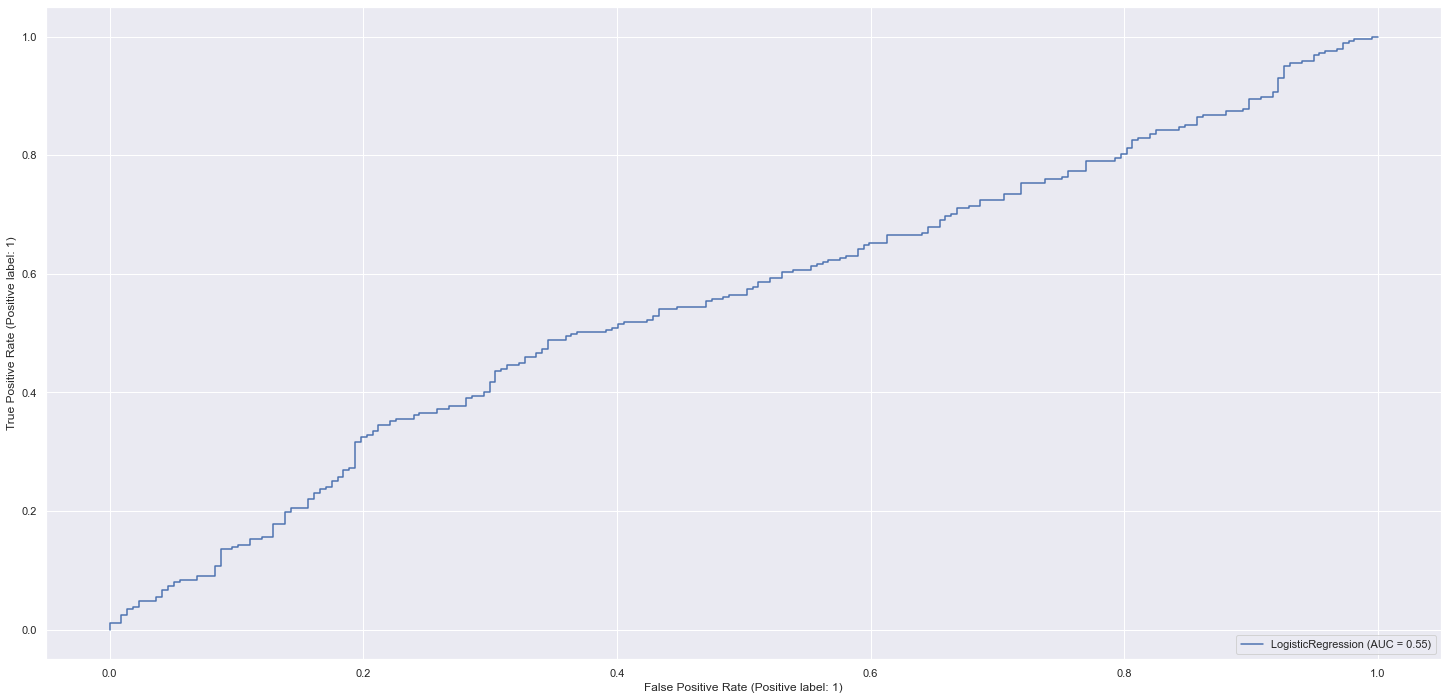

In [100]:
plot_roc_curve(lr_model, x_test1, y_test1)

# Neural Networks

## Feature Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#sc = MinMaxScaler( feature_range = (0, 1) )
sc = StandardScaler()
x_train1 = sc.fit_transform( x_train1 )

## Reshaping

In [41]:
#x_train1.head()

In [42]:
x_train1 = np.asarray( x_train1 ).astype( np.float32 )
x_train1 = np.reshape( x_train1, ( x_train1.shape[0], x_train1.shape[1], 1 ) )

## Initialising the RNN

In [43]:
clf = Sequential()

## Adding the first layer and dropout regularisation

In [44]:
clf.add( LSTM( units = 100, return_sequences = True, input_shape = ( x_train1.shape[1], 1 ) ) )
clf.add( Dropout( 0.2 ) )

## Adding a second layer and dropout regularisation

In [45]:
clf.add( LSTM( units = 100, return_sequences = True, activation='tanh' ) )
clf.add( Dropout( 0.2 ) )

## Adding a third layer and dropout regularisation

In [46]:
clf.add( LSTM( units = 100, return_sequences = True, activation='tanh' ) )
clf.add( Dropout( 0.2 ) )

In [47]:
clf.add( LSTM( units = 100, return_sequences = True, activation='tanh' ) )
clf.add( Dropout( 0.2 ) )

In [48]:
clf.add( LSTM( units = 100, return_sequences = True, activation='tanh' ) )
clf.add( Dropout( 0.2 ) )

In [49]:
clf.add( LSTM( units = 100, return_sequences = True, activation='tanh' ) )
clf.add( Dropout( 0.2 ) )

## Adding a fourth layer and dropout regularisation

In [50]:
clf.add( LSTM( units = 100, activation='tanh' ) )
clf.add( Dropout( 0.2 ) )

## Adding the output layer and dropout regularisation

In [51]:
clf.add( Dense( units = 1, activation='sigmoid' ) )

## Compiling the RNN

In [59]:
#clf.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'] )
clf.compile( optimizer = 'adam', loss = 'mean_squared_error', metrics=[mean_squared_error] )

## Fitting the RNN

In [60]:
clf.fit( x_train1, y_train1, epochs = 100, batch_size = 50 )

Epoch 1/100


OperatorNotAllowedInGraphError: in user code:

    File "C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\sklearn\metrics\_regression.py", line 441, in mean_squared_error  *
        y_type, y_true, y_pred, multioutput = _check_reg_targets(
    File "C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\sklearn\metrics\_regression.py", line 100, in _check_reg_targets  *
        check_consistent_length(y_true, y_pred)
    File "C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\sklearn\utils\validation.py", line 385, in check_consistent_length  *
        uniques = np.unique(lengths)
    File "<__array_function__ internals>", line 5, in unique  **
        
    File "C:\Users\lucas\AppData\Roaming\Python\Python38\site-packages\numpy\lib\arraysetops.py", line 263, in unique
        ret = _unique1d(ar, return_index, return_inverse, return_counts)
    File "C:\Users\lucas\AppData\Roaming\Python\Python38\site-packages\numpy\lib\arraysetops.py", line 311, in _unique1d
        ar.sort()

    OperatorNotAllowedInGraphError: using a `tf.Tensor` as a Python `bool` is not allowed: AutoGraph did convert this function. This might indicate you are trying to use an unsupported feature.


### Getting the predicted S&P 500

In [130]:
#x_test1 = np.asarray( x_test1 ).astype( np.float32 )
x_test1 = sc.transform( x_test1 )
x_test1 = np.reshape( x_test1, ( x_test1.shape[0], x_test1.shape[1], 1 ) )

ValueError: Found array with dim 3. StandardScaler expected <= 2.

In [131]:
y_pred1 = clf.predict( x_test1 )
y_pred1 =( y_pred1 > 0.5 )

In [132]:
#y_pred1

### Visualising the results

In [133]:
clf.evaluate( x_train1, y_train1 ) # Loss and accuracy of the model

157/157 [==============================] - 5s 13ms/step - loss: 0.6891 - accuracy: 0.5358


[0.6891413331031799, 0.5357856750488281]

In [134]:
# Confusion Matrix and Classification Metrics

print(confusion_matrix( y_test1, y_pred1 ) )
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report( y_test1, y_pred1 ) )

[[  0 217]
 [  0 287]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       217
           1       0.57      1.00      0.73       287

    accuracy                           0.57       504
   macro avg       0.28      0.50      0.36       504
weighted avg       0.32      0.57      0.41       504



C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucas\Anaconda3\envs\py_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
# Area Under Curve

fpr, tpr, thresholds = roc_curve( y_test1, y_pred1 )
auc( fpr, tpr )

0.485332134427335

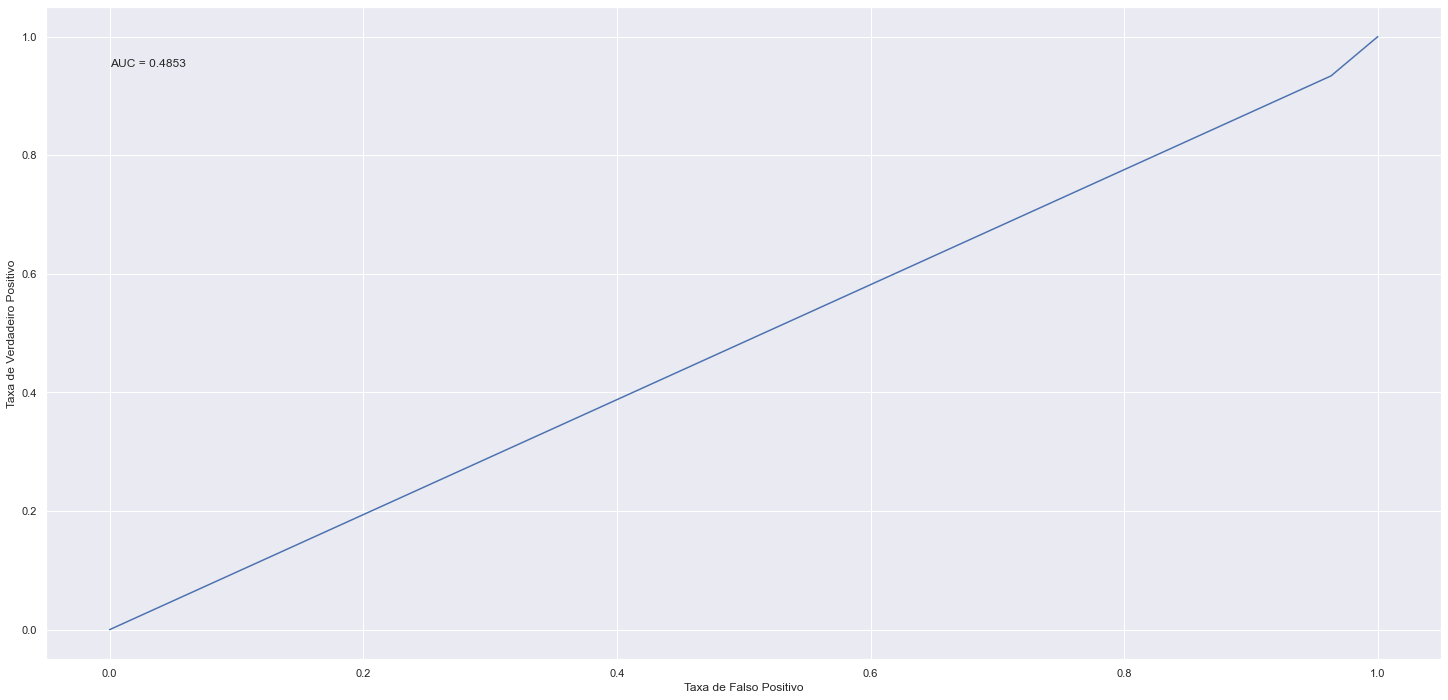

In [118]:
plt.plot(fpr, tpr)
plt.text(0.0, 0.95, "AUC = " + str(round(auc( fpr, tpr ),4)))
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show();